In [6]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
low_activity_repos = pd.read_csv("data/fake_stars_low_activity_repos.csv")
low_activity_repos.head()

,repo_id,repo_names,n_stars,n_stars_low_activity,p_stars_low_activity
0,NaN,popofiraco/pancake-swap,377,377,1.0
1,NaN,vergessene/Library-Needle,358,358,1.0
2,NaN,lucasilmar/dmgunz,497,497,1.0
3,NaN,CreepyCat01/Wondershare-Filmora,51,51,1.0
4,NaN,JHONNEX/ValorantCheat-External,51,51,1.0


In [7]:
stars_by_month = pd.read_csv("data/fake_stars_low_activity_stars_by_month.csv")
stars_by_month["n_real_stars"] = stars_by_month["n_stars"] - stars_by_month["n_fake_stars"]
stars_by_month.head()

,repo,month,n_stars,n_low_activity_stars
0,01072006/der8gyXjjYMQ6KFVAg,2024-04,65,59
1,05Konz/Blooket-Cheats,2023-08,56,1
2,05Konz/Blooket-Cheats,2023-09,37,6
3,05Konz/Blooket-Cheats,2023-10,42,9
4,05Konz/Blooket-Cheats,2023-11,47,16


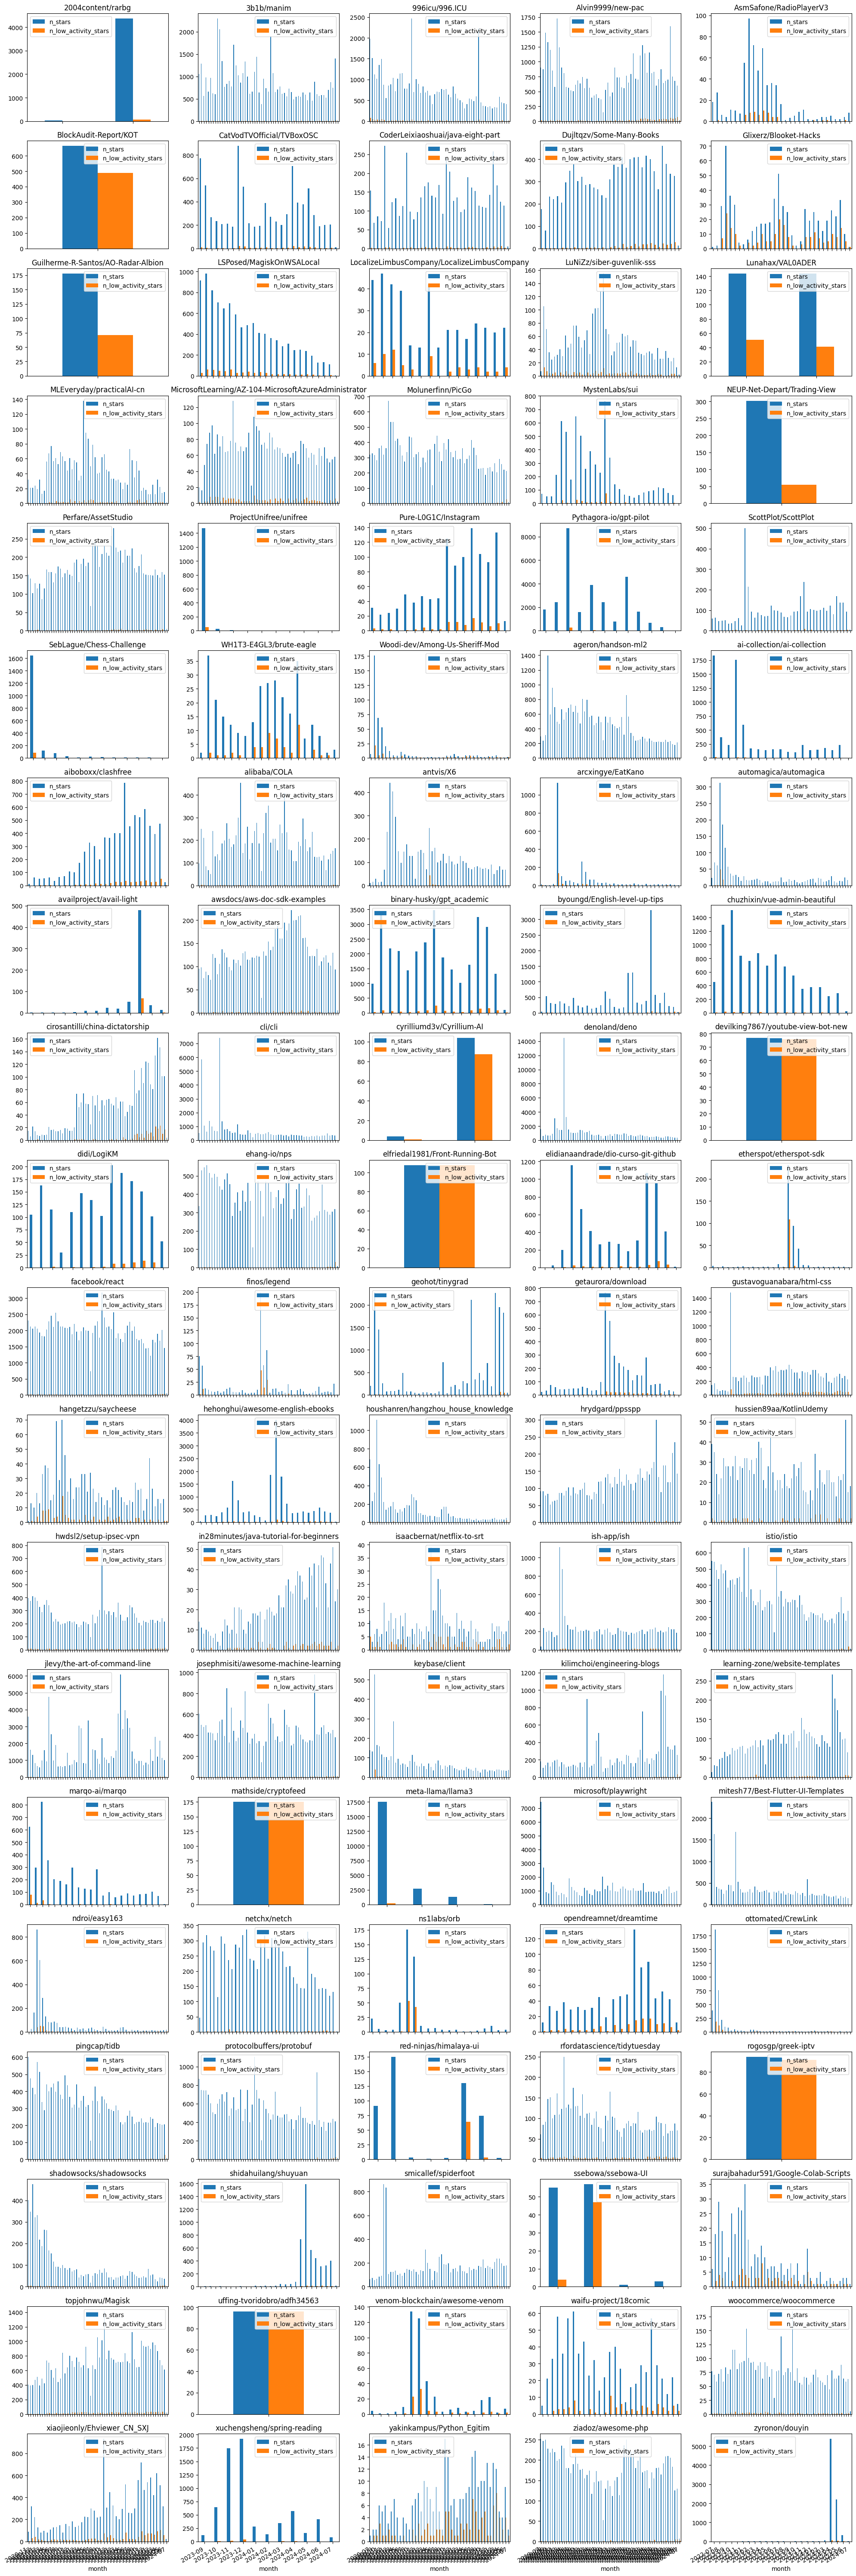

In [13]:
repos = random.sample(sorted(set(stars_by_month["repo"])), 100)
fig, axes = plt.subplots(20, 5, figsize=(20, 60))
for i, (repo, df) in enumerate(
    stars_by_month[stars_by_month.repo.isin(repos)].groupby("repo")
):
    df.plot(kind="bar", x="month", ax=axes[i // 5, i % 5], title=repo)
fig.autofmt_xdate()
fig.tight_layout()